Был взят датасет "Титаник" https://www.kaggle.com/competitions/titanic-dataset/data, удалены лищние колонки fare, body, а также строки с пустым полем age

In [374]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from io import StringIO
from IPython.display import Image
import graphviz
import pydotplus
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")


In [375]:
#импортируем тестовую и обучающую выбрки
df = pd.read_csv('titanic_train.csv')


In [376]:
total_count = df.shape[0]
num_cols = []
for col in df.columns:
    # Количество пустых значений
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка age. Тип данных float64. Количество пустых значений 174, 20.47%.
Колонка fare. Тип данных float64. Количество пустых значений 1, 0.12%.
Колонка body. Тип данных float64. Количество пустых значений 777, 91.41%.


In [377]:
# Удаление строк, содержащих пустые значения

df = df.dropna(subset=['age'])


In [378]:
df.head()

passenger_id  pclass                                               name  \
1           699       3                                    Cacic, Mr. Luka   
2          1267       3  Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...   
3           449       2              Hocking, Mrs. Elizabeth (Eliza Needs)   
4           576       2                                    Veal, Mr. James   
5          1083       3                           Olsen, Mr. Henry Margido   

      sex   age  sibsp  parch  ticket     fare cabin embarked boat   body  \
1    male  38.0      0      0  315089   8.6625   NaN        S  NaN    NaN   
2  female  30.0      1      1  345773  24.1500   NaN        S  NaN    NaN   
3  female  54.0      1      3   29105  23.0000   NaN        S    4    NaN   
4    male  40.0      0      0   28221  13.0000   NaN        S  NaN    NaN   
5    male  28.0      0      0  C 4001  22.5250   NaN        S  NaN  173.0   

                  home.dest  survived  
1                   Croatia         0  
2                       NaN         0  
3      Cornwall / Akron, OH         1  
4  Barre, Co Washington, VT         0  
5                       NaN         0

In [379]:
total_count = df.shape[0]
print(total_count)

676


In [380]:
X = df[['age', 'pclass', 'sex']]
y = df[['survived']]
# Используем датасет обучающую выборку с признаками age, sex. pclass
data_X, test_X, data_y, test_y = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)
data_X = data_X.values
test_X = test_X.values
data_y = data_y.values.ravel()
test_y = test_y.values.ravel()

# # Преобразование data_X в одномерные массивы numpy для каждого признака
# X0 = data_X['age'].values
# X1 = data_X['pclass'].values


In [381]:


# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.tree import DecisionTreeClassifier

# def make_meshgrid(x, y, h=0.002):
#     x_min, x_max = x.min() - 1, x.max() + 1
#     y_min, y_max = y.min() - 1, y.max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))
#     return xx, yy

# def plot_contours(ax, clf, xx, yy, **params):
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     out = ax.contourf(xx, yy, Z, **params)
#     return out

# def plot_cl(clf):
#     title = clf.__repr__()
#     clf.fit(data_X, data_y)
#     fig, ax = plt.subplots(figsize=(5,5))
    
#     # Извлечение столбцов 'age' и 'pclass' как DataFrame, сохраняя имена столбцов
#     X0, X1 = data_X[['age']], data_X[['pclass']]
    
#     # Преобразование в массивы numpy для использования в meshgrid
#     X0 = X0.values.ravel()
#     X1 = X1.values.ravel()
    
#     xx, yy = make_meshgrid(X0, X1)
#     plot_contours(ax, clf, xx, yy, alpha=0.8, cmap=plt.cm.coolwarm)
    
#     ax.scatter(X0, X1, c=data_y.values, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    
#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel('Feature 1')
#     ax.set_ylabel('Feature 2')
#     ax.set_xticks(())
#     ax.set_yticks(())
#     ax.set_title(title)
#     plt.show()

# # Пример использования функции
# # Предположим, что data_X и data_y уже определены
# # plot_cl(DecisionTreeClassifier(random_state=1), data_X, data_y)


# # from mpl_toolkits.mplot3d import Axes3D
# # from sklearn.decomposition import PCA

# # def plot_cl(clf):
# #     # Обучение модели
# #     clf.fit(X, y)
    
# #     # Создание 3D-графика
# #     fig = plt.figure(figsize=(10, 8))
# #     ax = fig.add_subplot(111, projection='3d')
    
# #     # Создание сетки для визуализации
# # # Создание сетки для визуализации
# #     x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
# #     y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
# #     z_min, z_max = X.iloc[:, 2].min() - 1, X.iloc[:, 2].max() + 1

    
# #     xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.02),
# #                              np.arange(y_min, y_max, 0.02),
# #                              np.arange(z_min, z_max, 0.02))
    
# #     # Предсказание на сетке
# #     Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
# #     Z = Z.reshape(xx.shape)
    
# #     # Визуализация сетки предсказаний
# #     ax.plot_surface(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
#     # # Визуализация исходных точек
#     # ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    
#     # # Настройка осей
#     # ax.set_xlabel('sex')
#     # ax.set_ylabel('age')
#     # ax.set_zlabel('pclass')
    
#     # # Настройка заголовка
#     # ax.set_title('3D Decision Boundary')
    
#     # # Показать график
#     # plt.show()



In [382]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(data_X, data_y)
    fig, ax = plt.subplots(figsize=(5,5))
    # X0, X1 = data_X[:, 0], data_X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=data_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('age')
    ax.set_ylabel('pclass')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

In [383]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

In [384]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

In [385]:
def accuracy_score_for_classes(
    y_true: np.ndarray,
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса,
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values,
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray,
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [386]:
# Обучим классификатор на 5 деревьях
bc1 = BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)
bc1.fit(data_X, data_y)

ValueError: could not convert string to float: 'female'

In [ ]:
# Сконвертируем эти данные в двоичную матрицу,
# 1 соответствует элементам, попавшим в обучающую выборку
bin_array = np.zeros((5, data_X.shape[0]))
for i in range(5):
    for j in bc1.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 1.]])

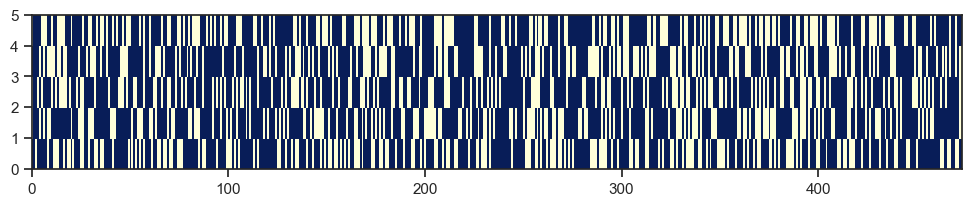

In [ ]:
# И визуализируем (синим цветом показаны данные, которые попали в обучающую выборку)
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

In [ ]:
# Оценим Out-of-bag error, теоретическое значение 37%
for i in range(5):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели № 1 размер OOB составляет 38.690000000000005%
Для модели № 2 размер OOB составляет 36.36%
Для модели № 3 размер OOB составляет 35.52%
Для модели № 4 размер OOB составляет 37.419999999999995%
Для модели № 5 размер OOB составляет 40.589999999999996%


In [ ]:
# Out-of-bag error, возвращаемый классификатором
# Для классификации используется метрика accuracy
bc1.oob_score_, 1-bc1.oob_score_

(0.6553911205073996, 0.34460887949260044)

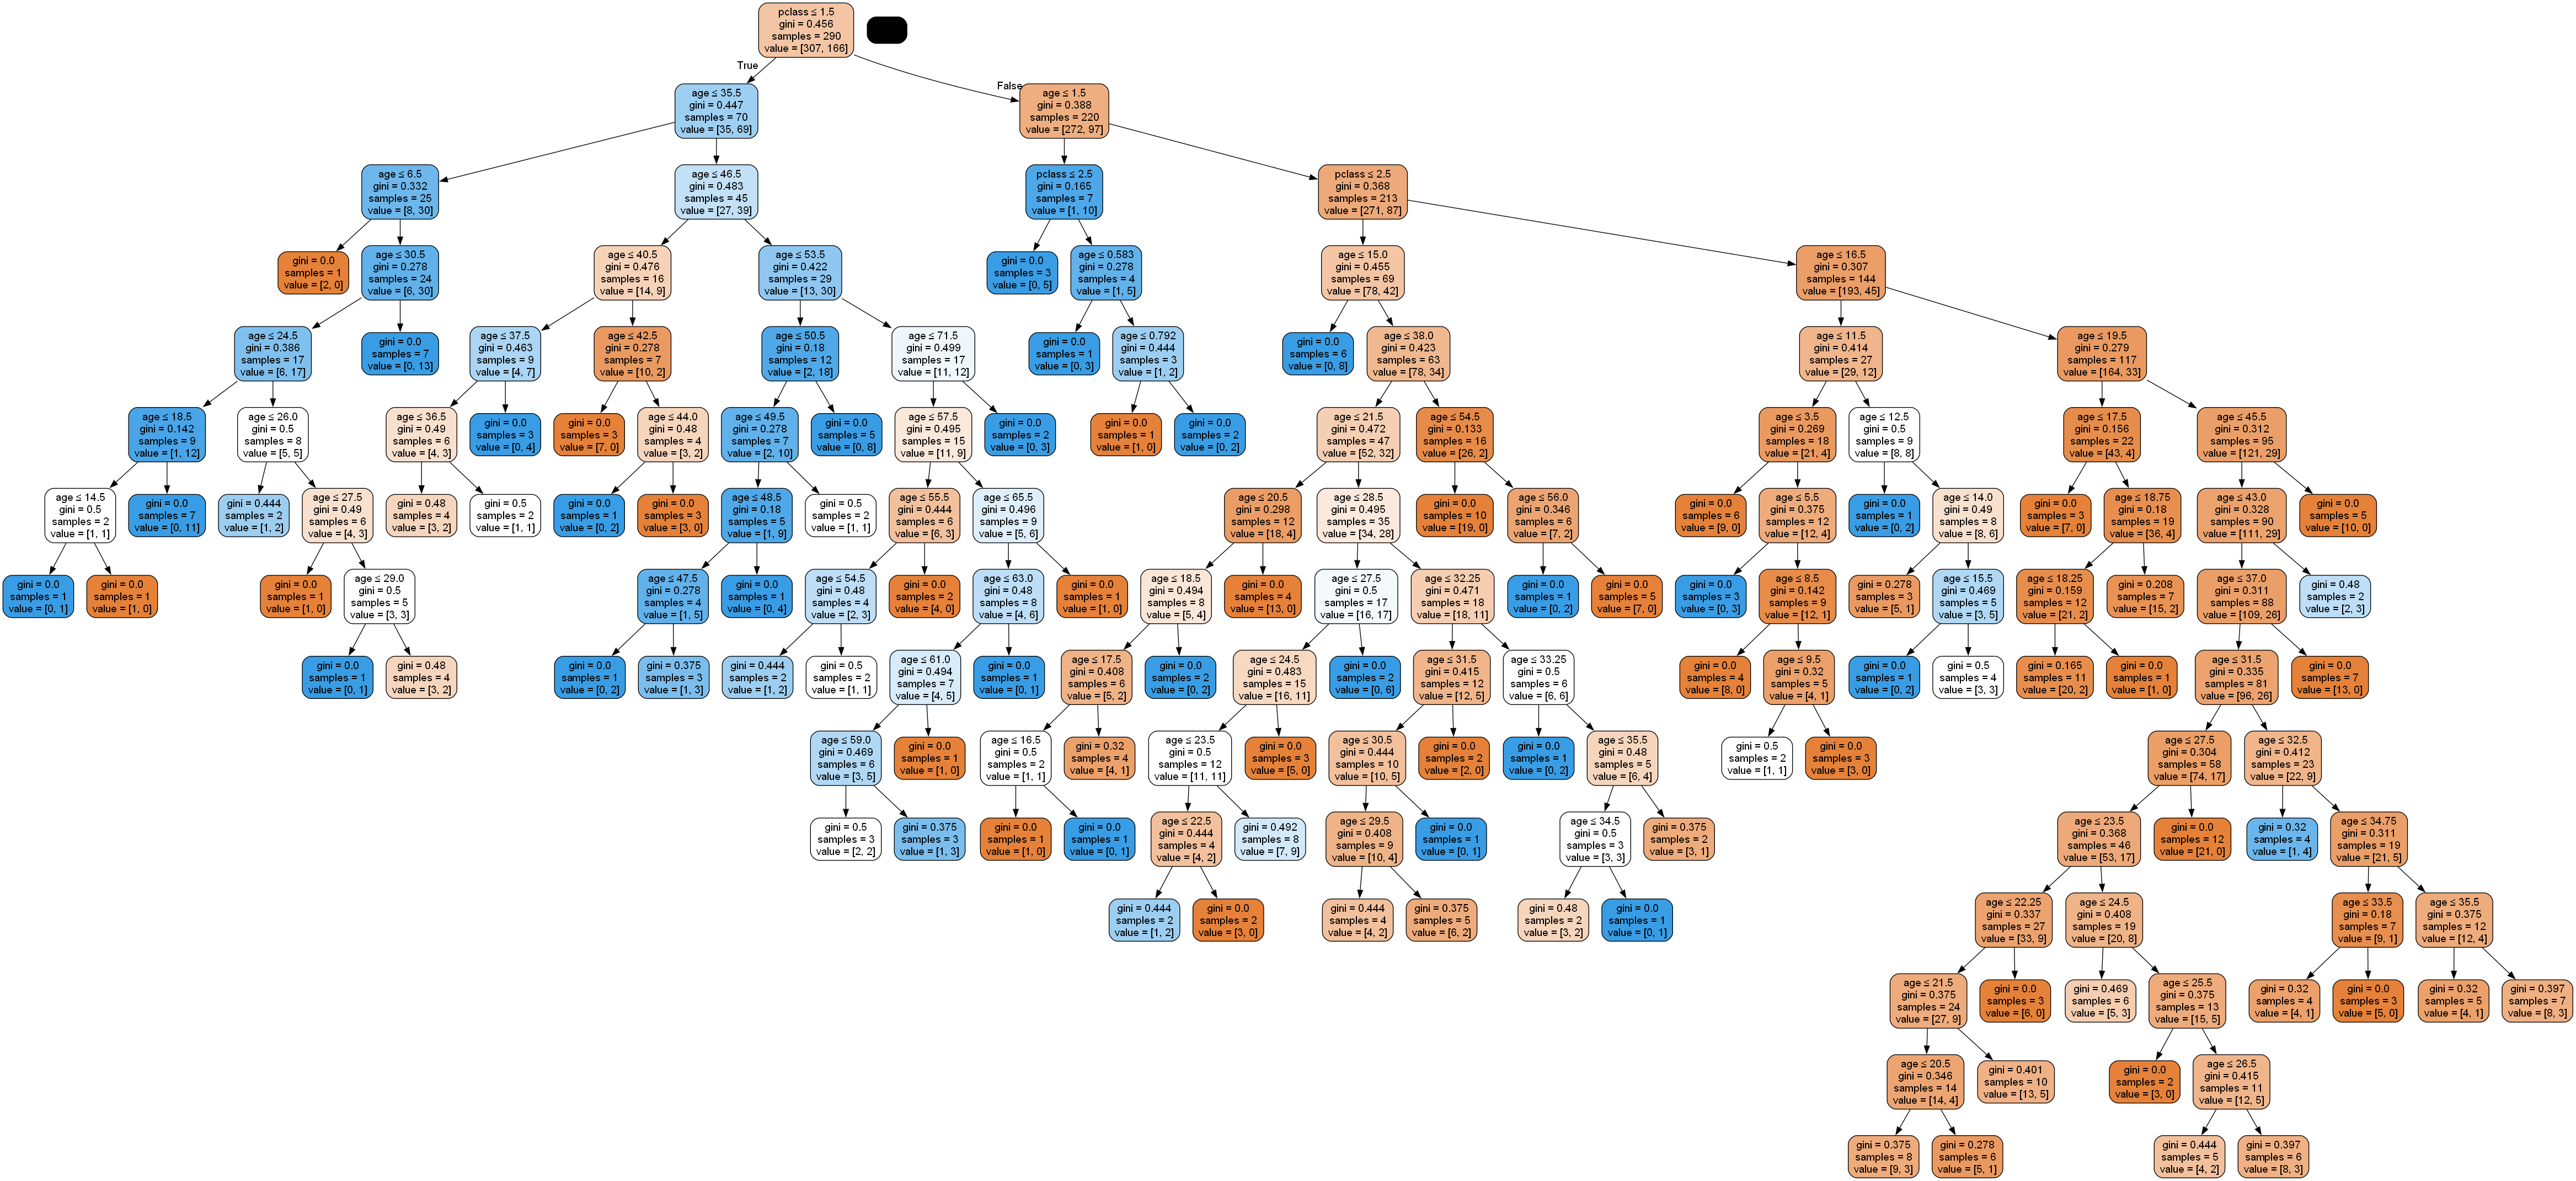

In [ ]:
# Визуализация обученных решающих деревьев
from sklearn.tree import plot_tree
# Получение первого обученного дерева из BaggingClassifier
tree = bc1.estimators_[0]

# Получение названий столбцов 'age', 'sex', 'pclass'
feature_names = ['age', 'pclass', 'sex']

# # Визуализация дерева решений
# plt.figure(figsize=(15, 10))
# plot_tree(tree, feature_names=feature_names, filled=True)
# plt.show()

# Визуализация обученных решающих деревьев
Image(get_png_tree(bc1.estimators_[0], feature_names), width='80%')

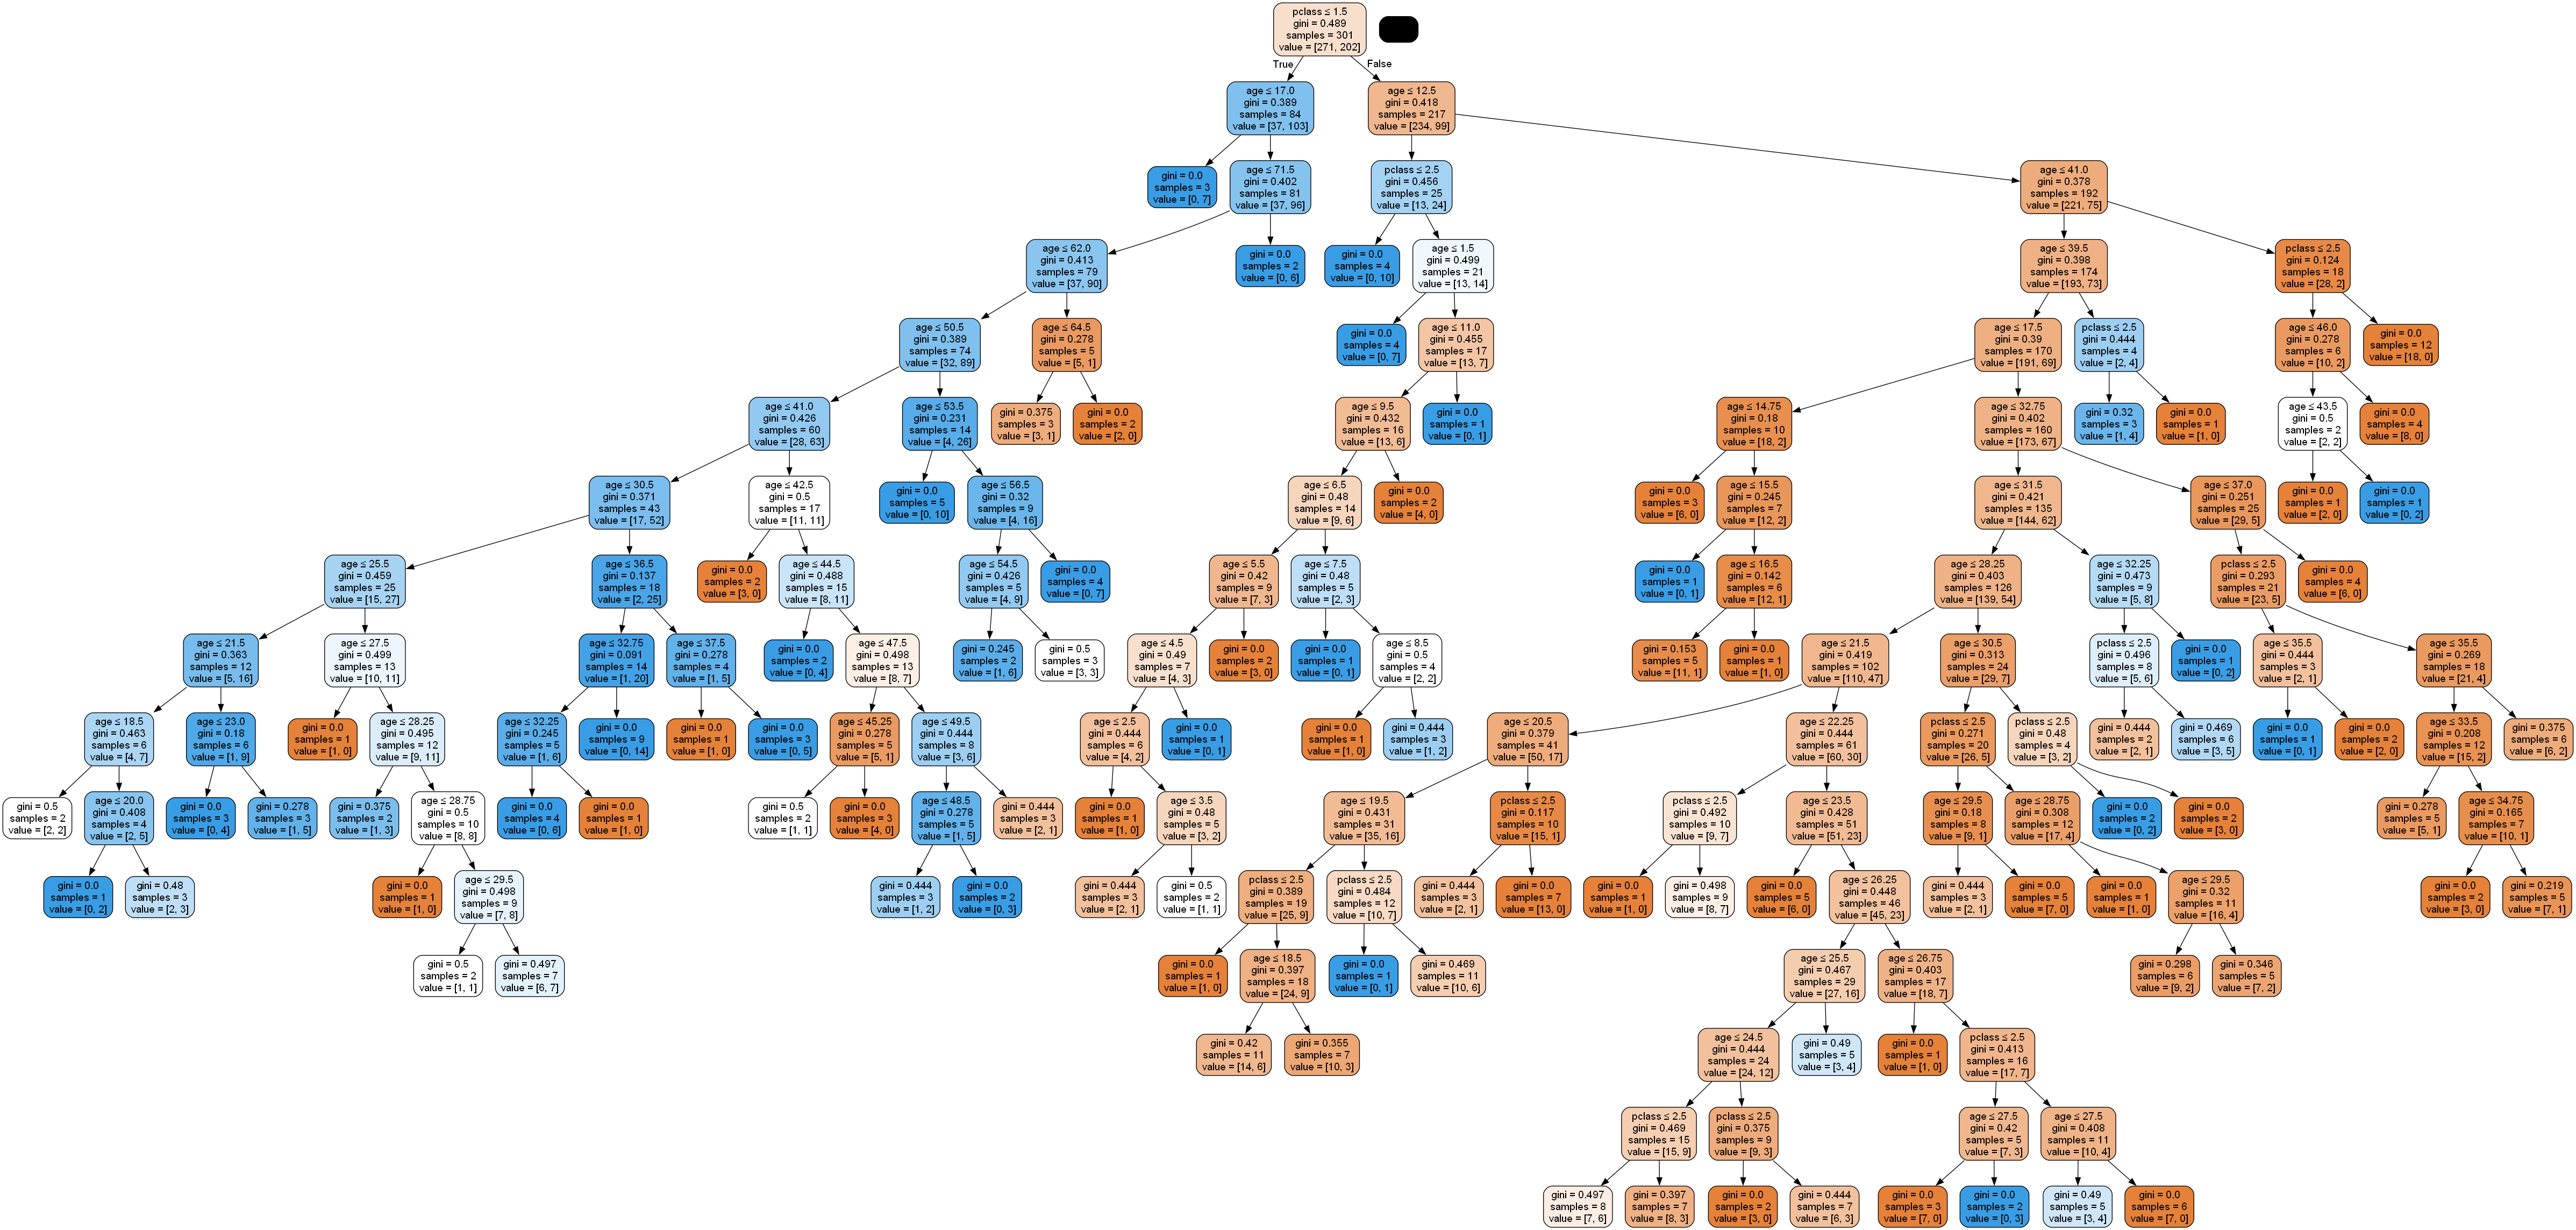

In [ ]:
tree = bc1.estimators_[1]

# Получение названий столбцов 'age', 'sex', 'pclass'


# Визуализация обученных решающих деревьев
Image(get_png_tree(bc1.estimators_[1], feature_names), width='80%')

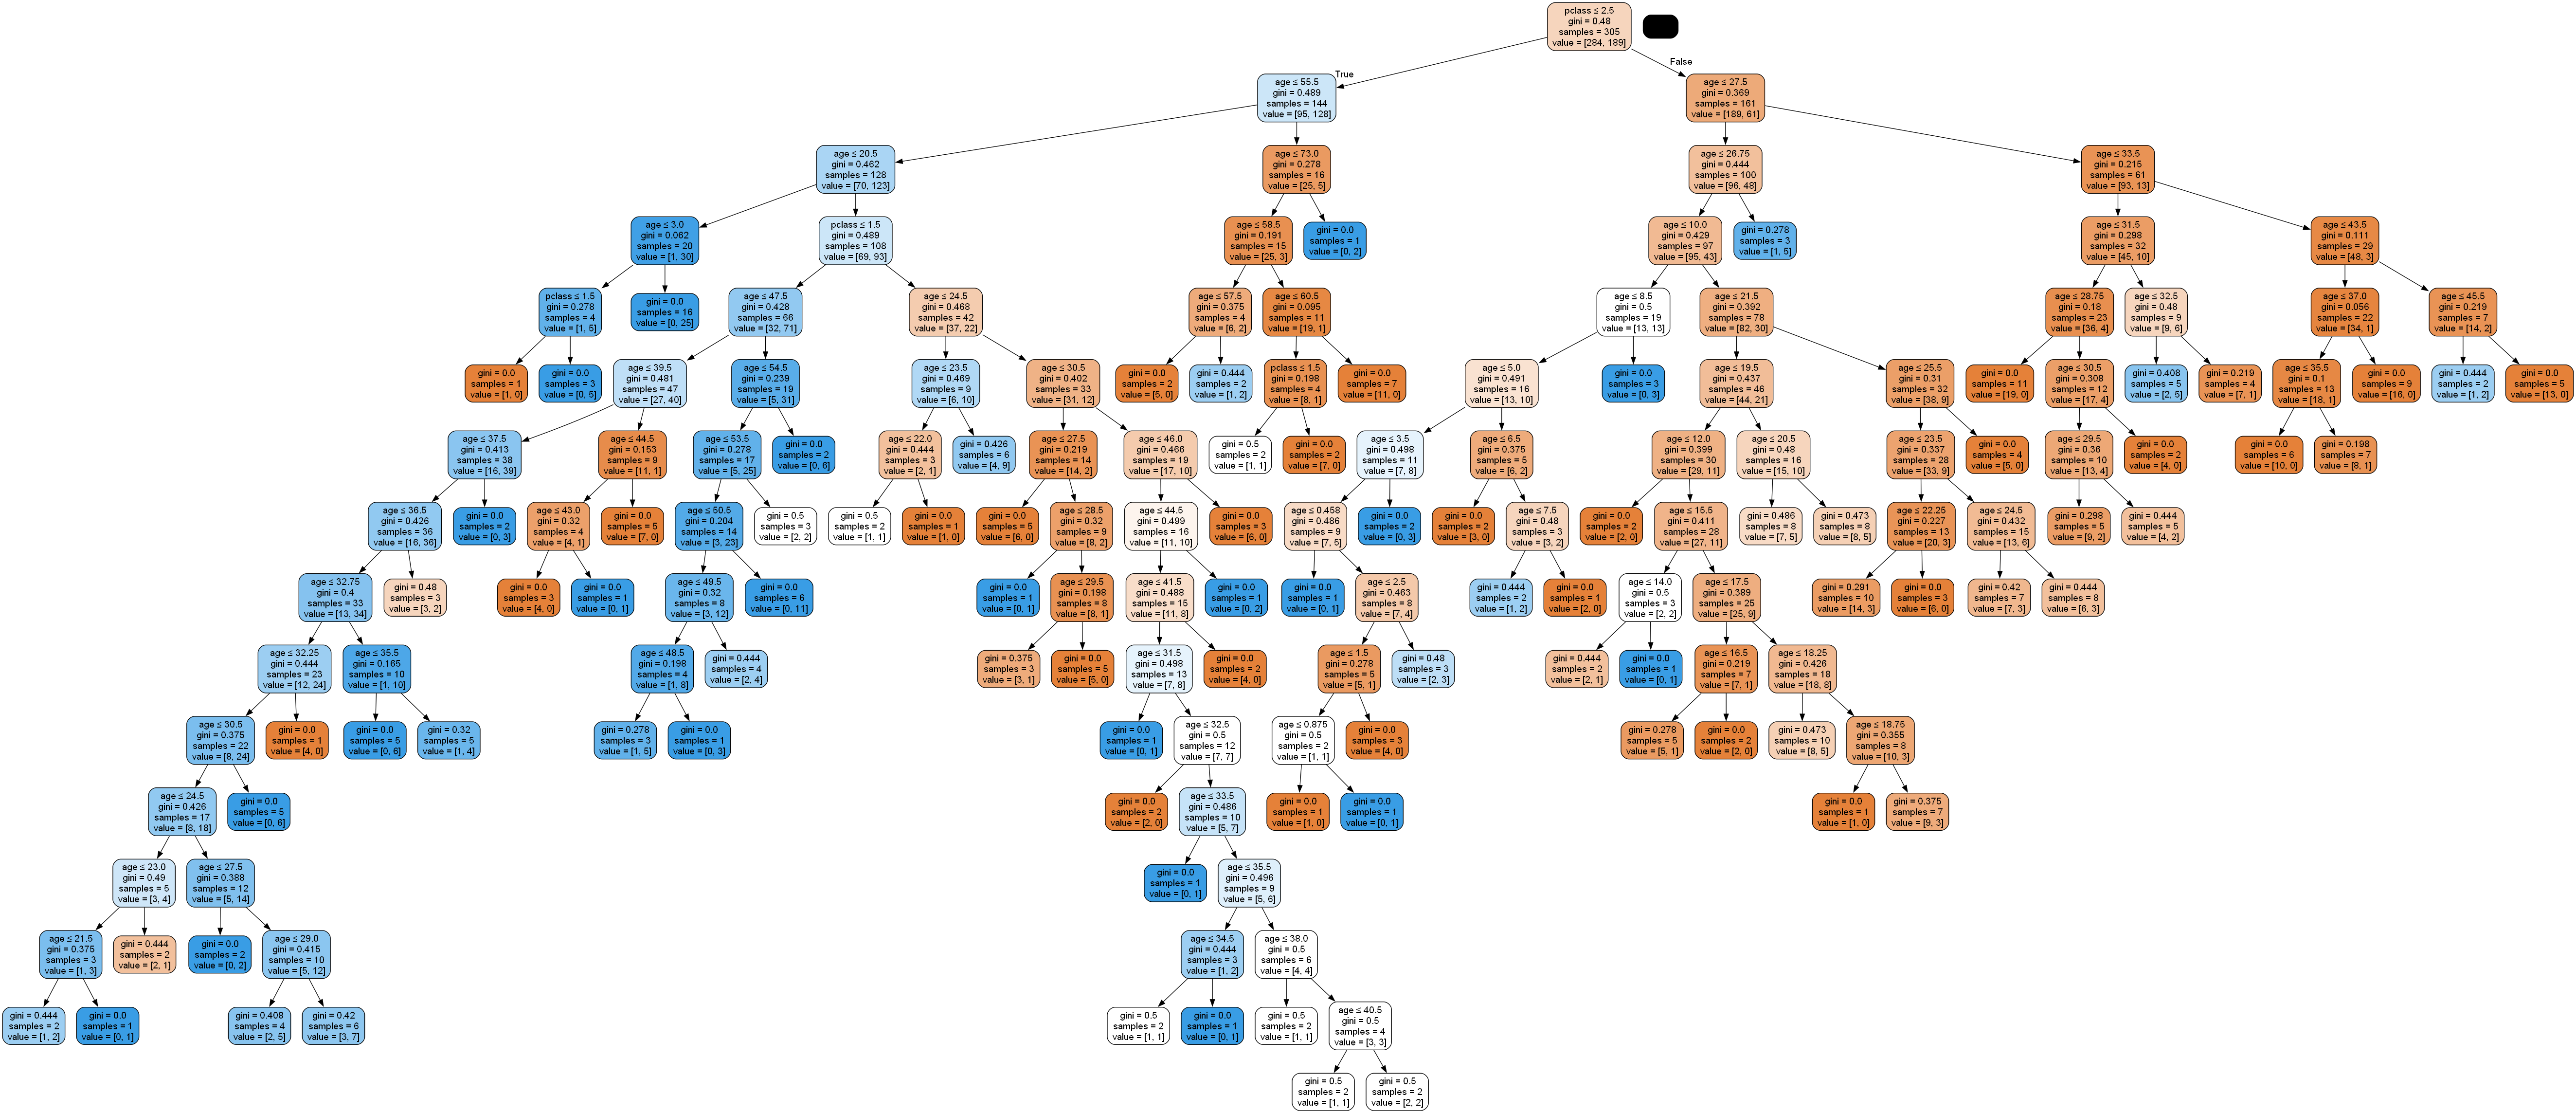

In [ ]:
tree = bc1.estimators_[2]

# Получение названий столбцов 'age', 'sex', 'pclass'


# Визуализация обученных решающих деревьев
Image(get_png_tree(bc1.estimators_[2], feature_names), width='80%')

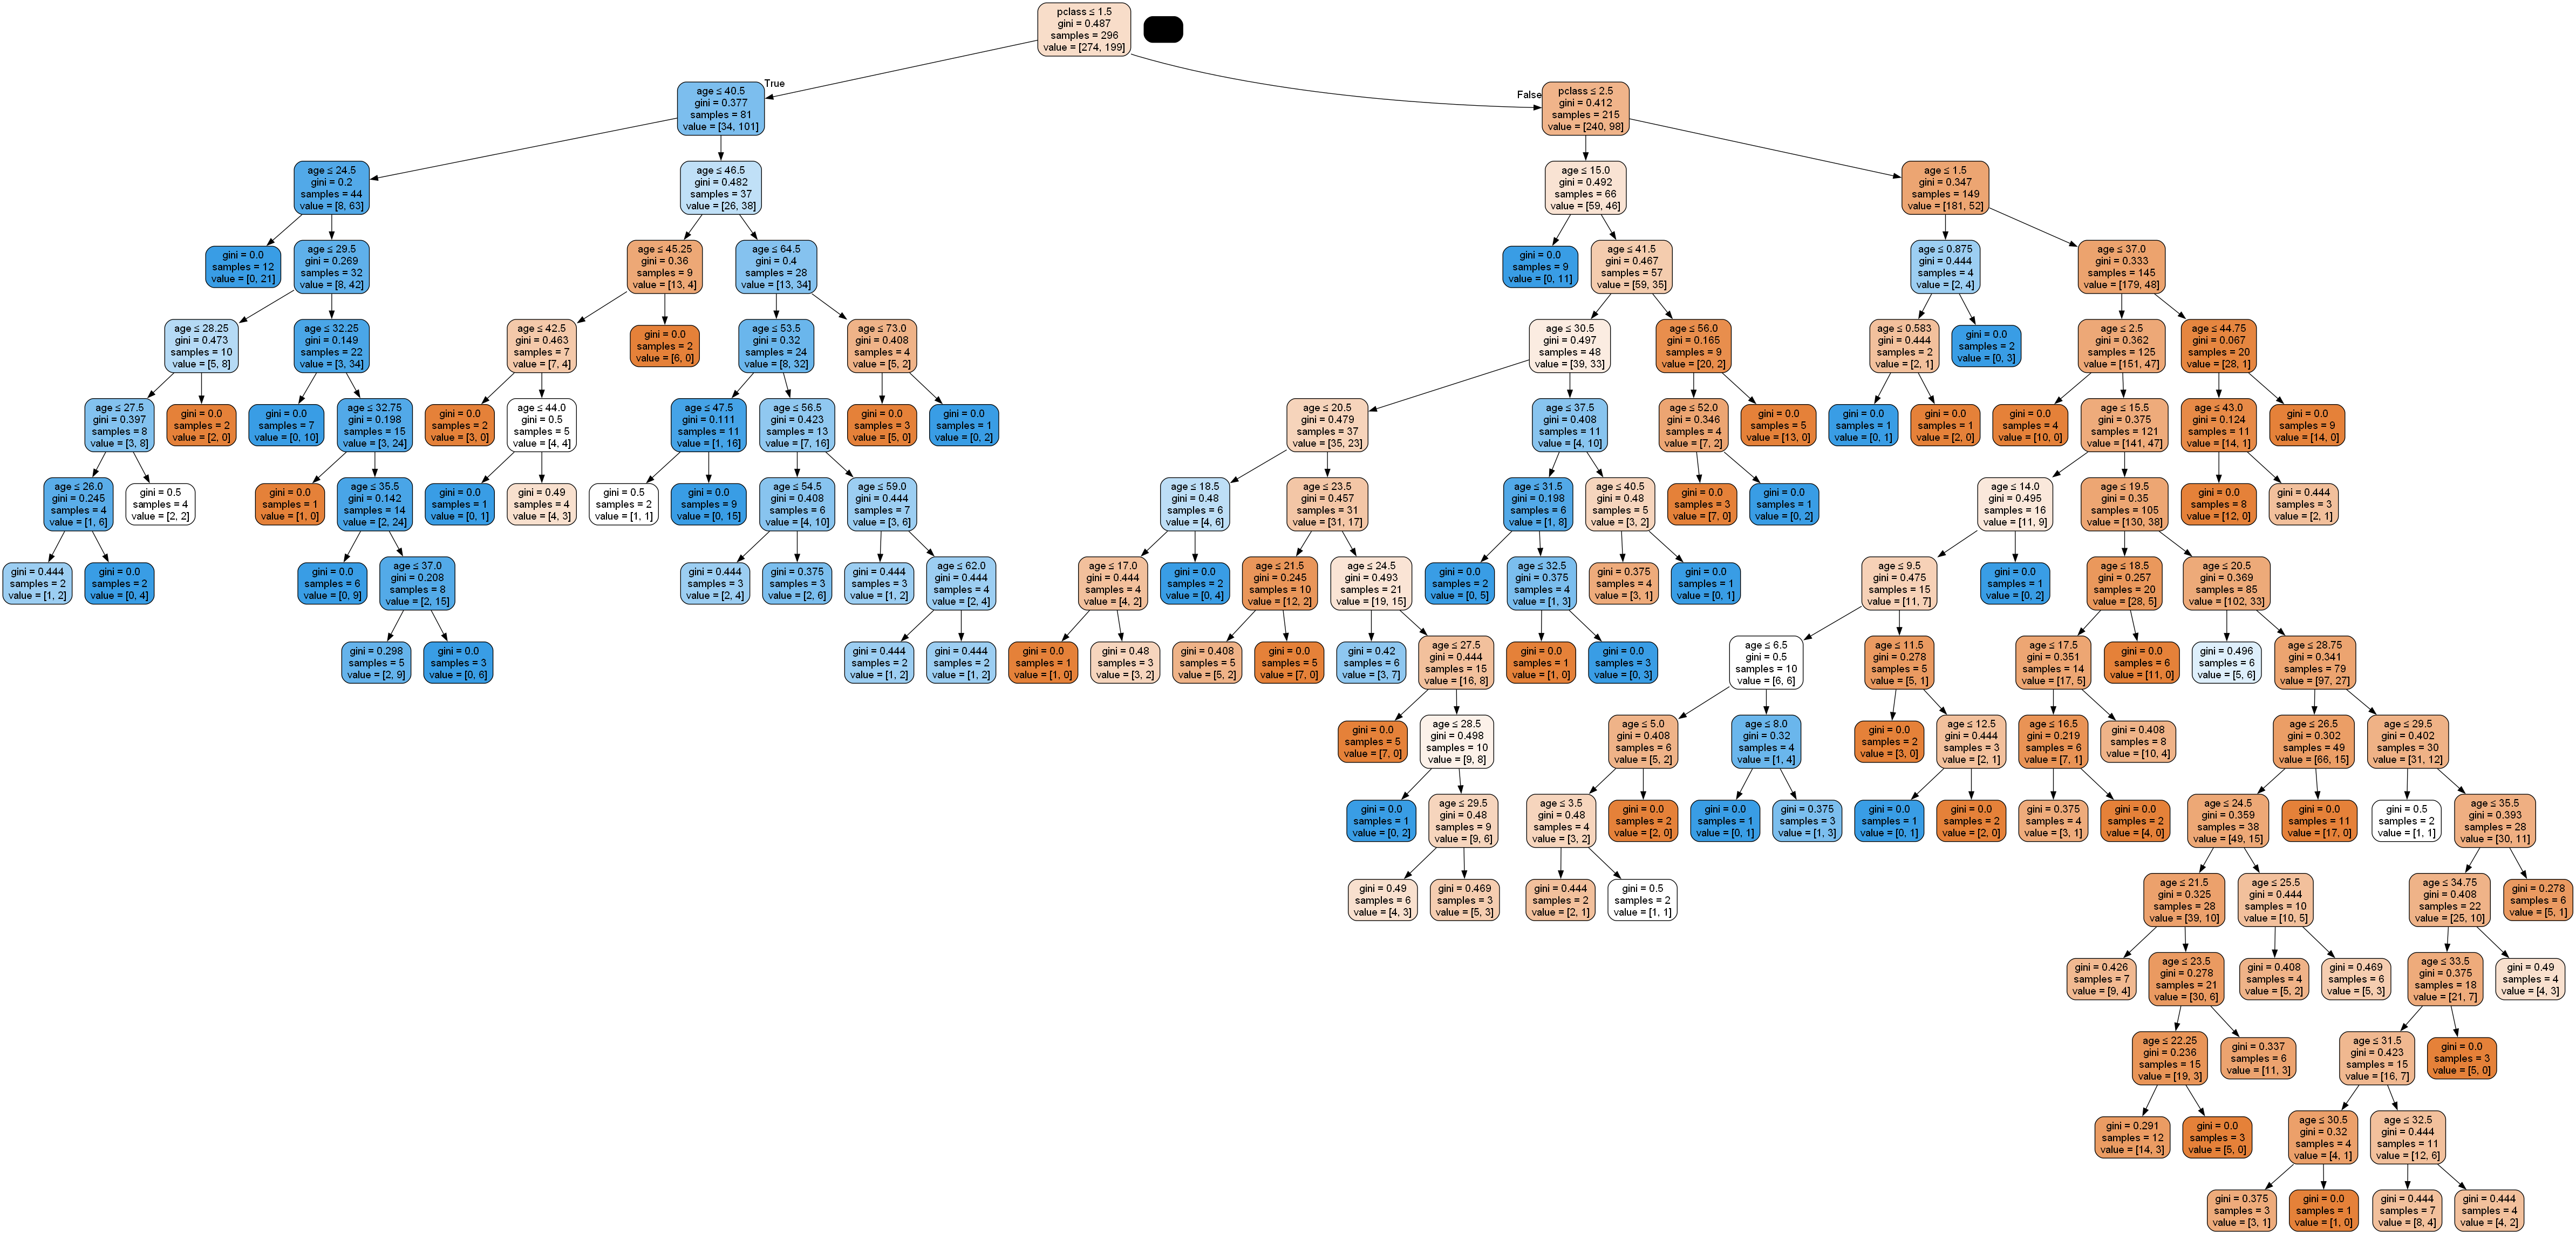

In [ ]:
tree = bc1.estimators_[3]



# Визуализация обученных решающих деревьев
Image(get_png_tree(bc1.estimators_[3], feature_names), width='80%')


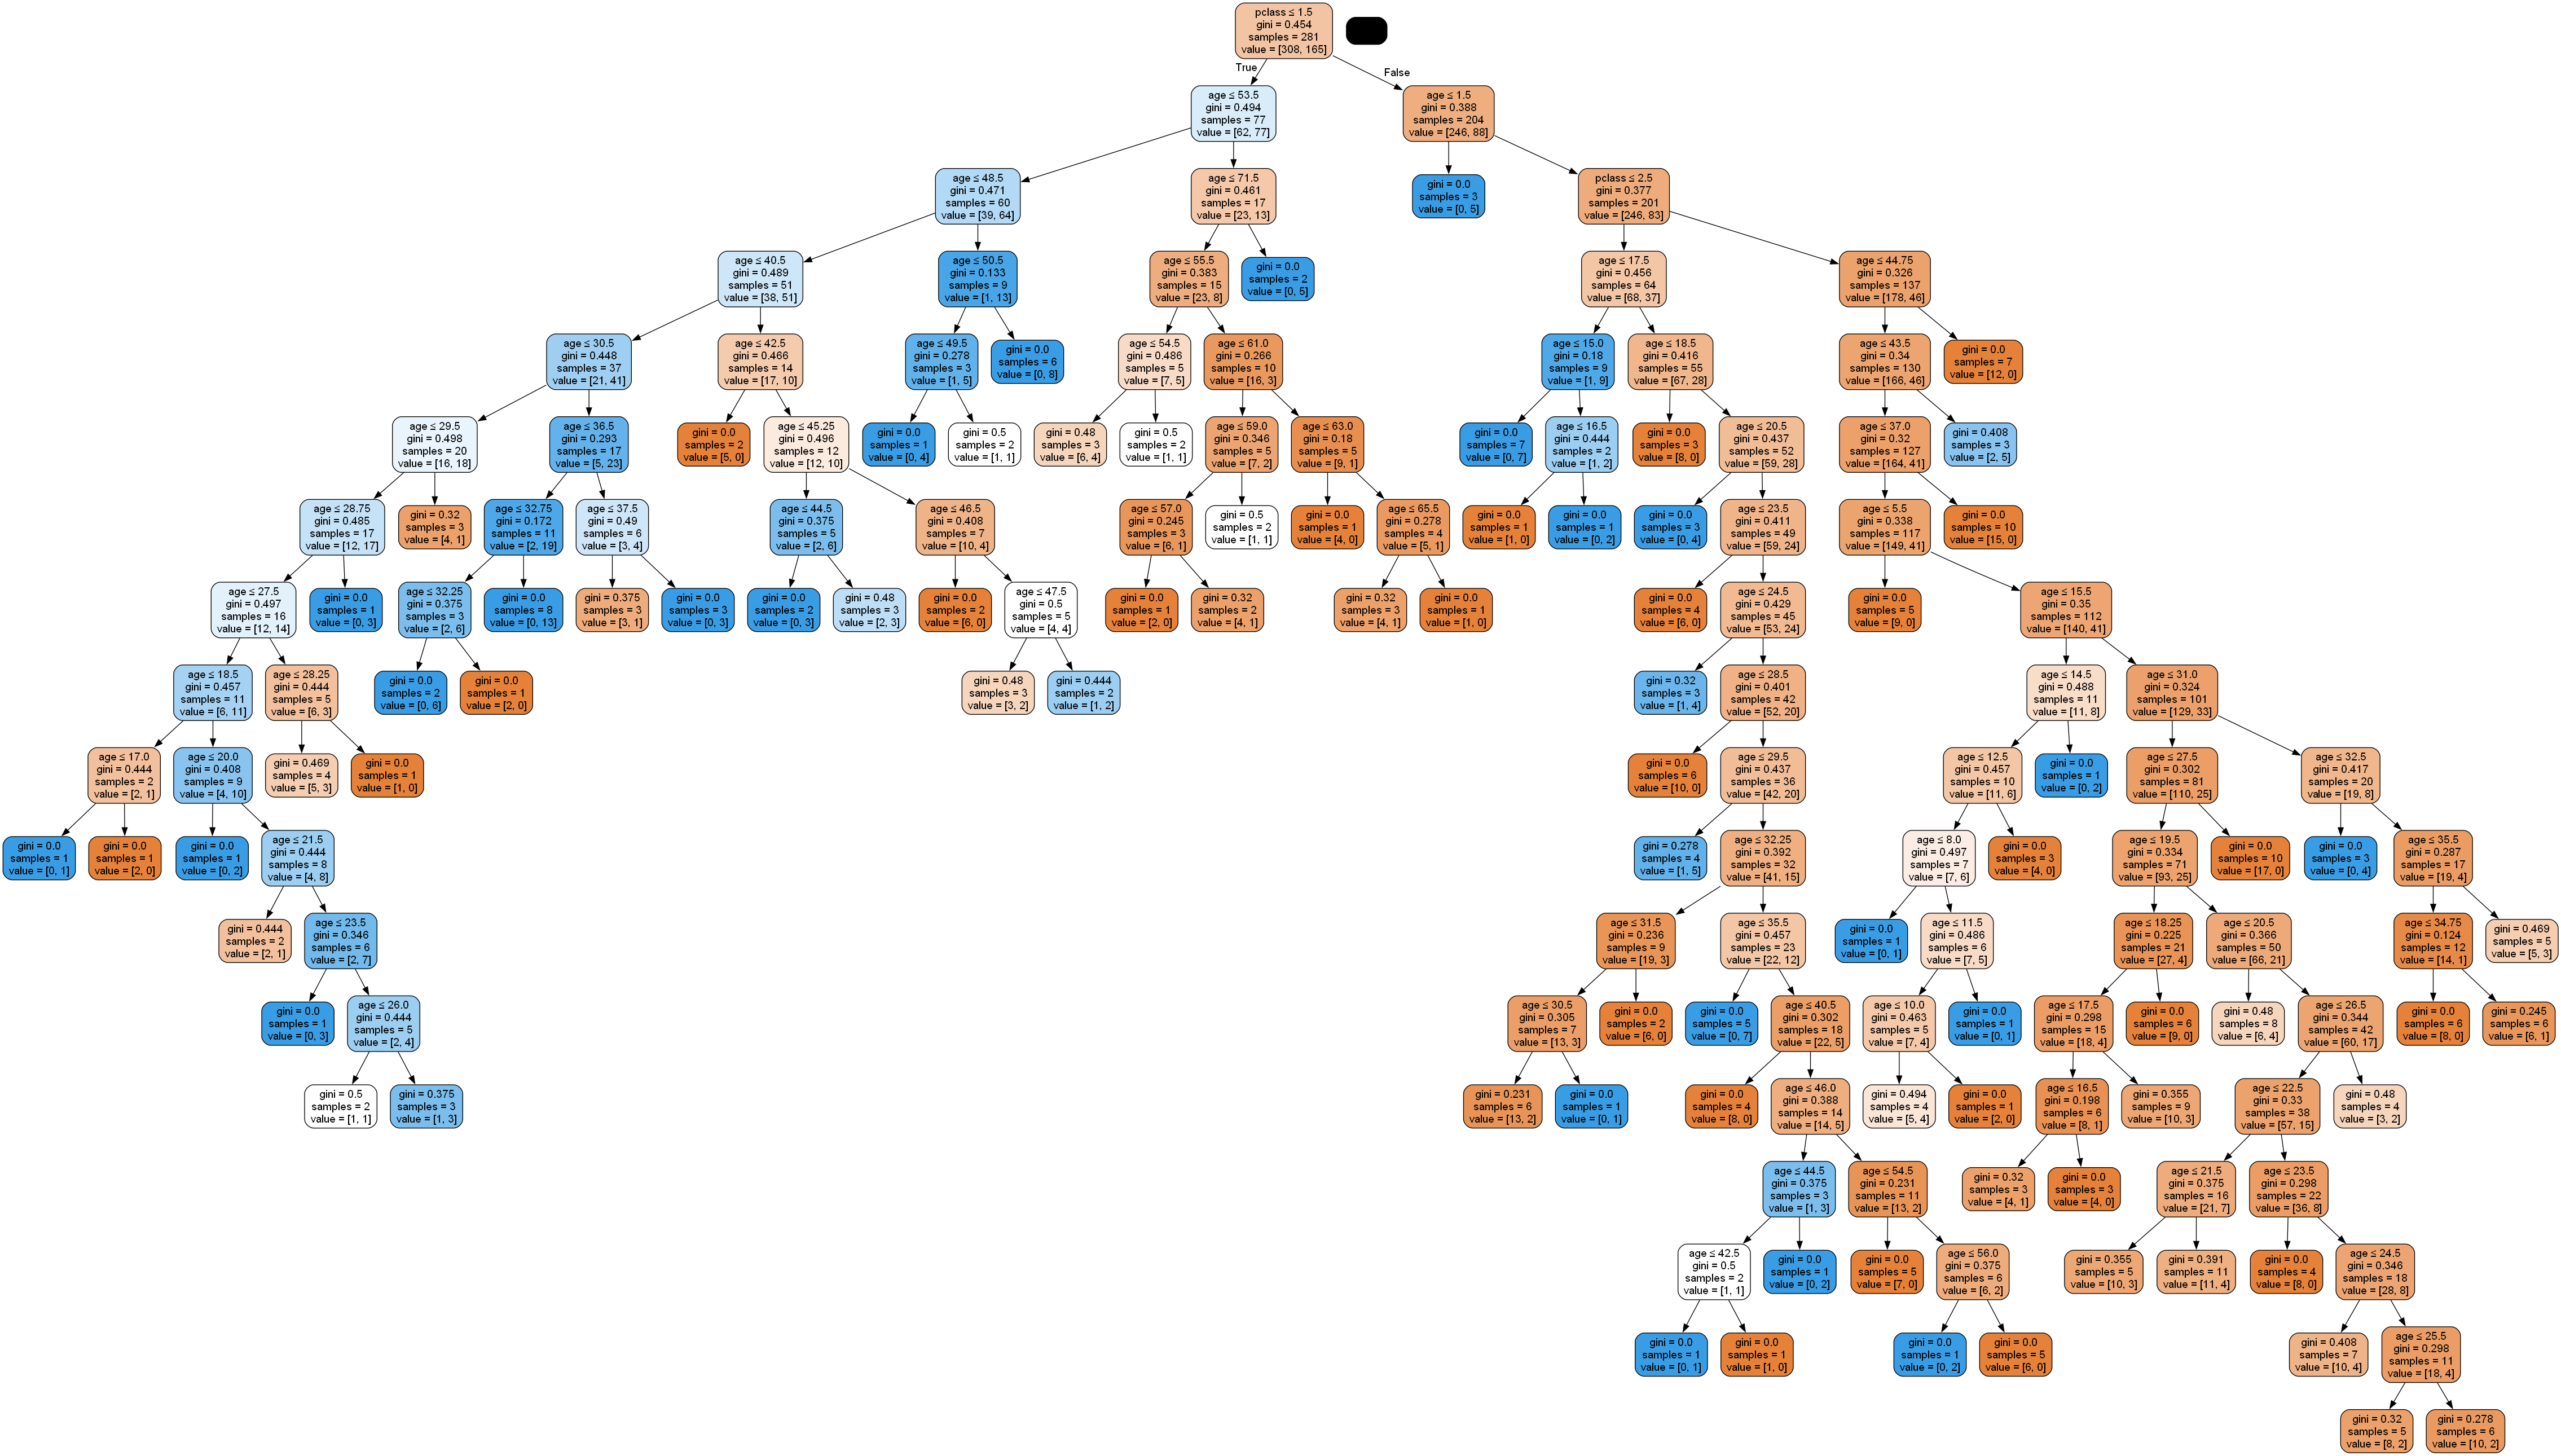

In [ ]:
tree = bc1.estimators_[4]



# Визуализация обученных решающих деревьев
Image(get_png_tree(bc1.estimators_[4], feature_names), width='80%')

Визуализация результатов классификации

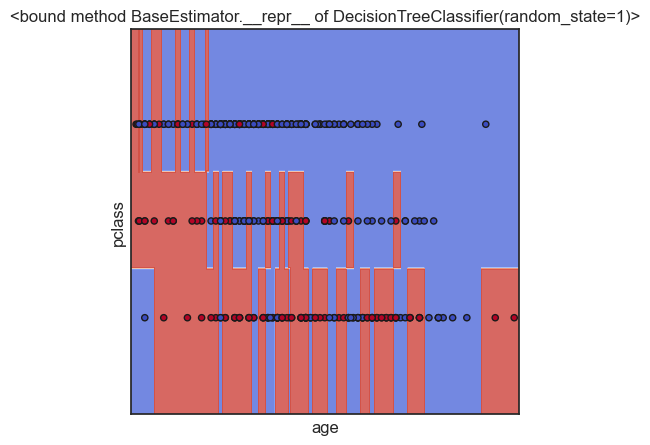

In [ ]:
plot_cl(DecisionTreeClassifier(random_state=1))

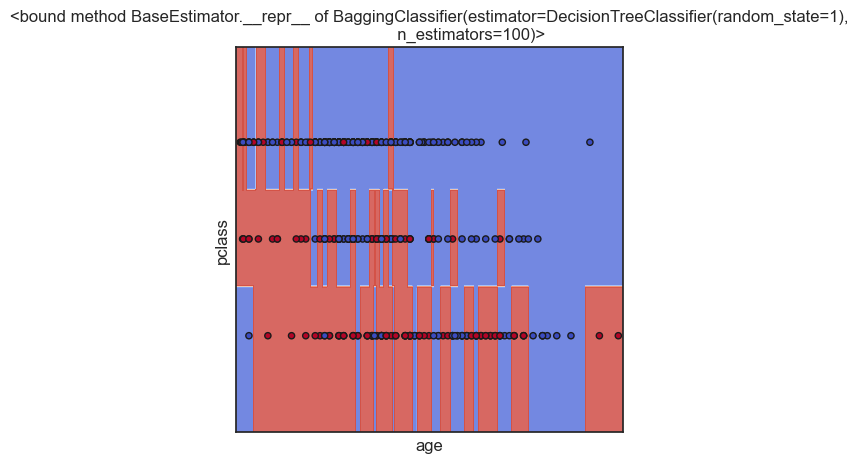

In [ ]:
plot_cl(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100))

Бустинг

In [ ]:
ab1 = AdaBoostClassifier(n_estimators=5, algorithm='SAMME', random_state=10)
ab1.fit(data_X, data_y)

AdaBoostClassifier(algorithm='SAMME', n_estimators=5, random_state=10)

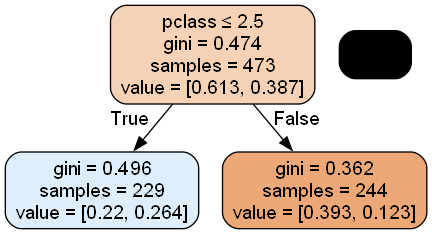

In [ ]:
Image(get_png_tree(ab1.estimators_[0], feature_names), width='40%')

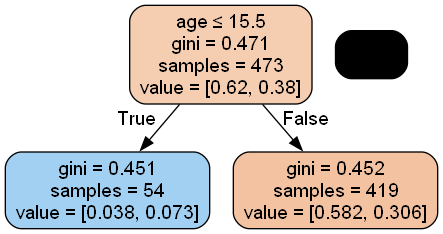

In [ ]:
Image(get_png_tree(ab1.estimators_[1], feature_names), width='40%')

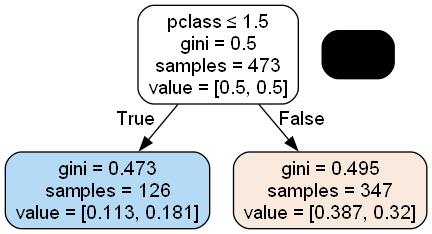

In [ ]:
Image(get_png_tree(ab1.estimators_[2], feature_names), width='40%')

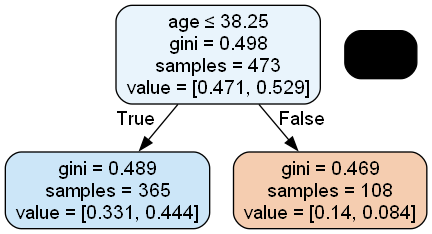

In [ ]:
Image(get_png_tree(ab1.estimators_[3], feature_names), width='40%')

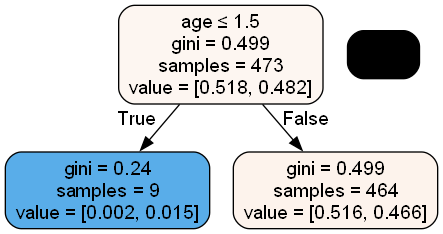

In [ ]:
Image(get_png_tree(ab1.estimators_[4], feature_names), width='40%')

In [ ]:
ab1.estimator_weights_

array([0.65219658, 0.64137981, 0.27206452, 0.3419475 , 0.12496788])

In [ ]:
df1 = ab1.decision_function(data_X)
df1.shape

(473,)

In [ ]:
df1[:10]

array([-2.        , -1.32705922, -0.0648461 , -2.        , -1.32705922,
       -0.71649984, -1.32705922, -1.32705922, -0.18108634,  0.49185444])

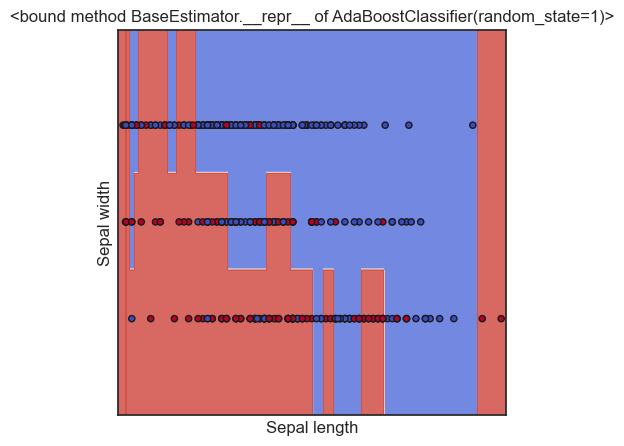

In [ ]:
# Результаты классификации
plot_cl(AdaBoostClassifier(random_state=1))

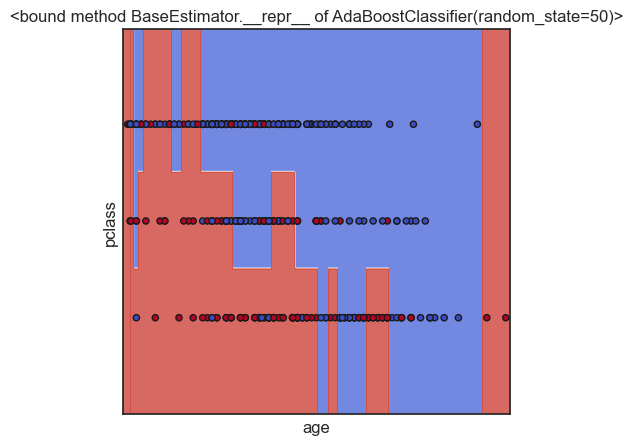

In [ ]:
# Результаты классификации
plot_cl(AdaBoostClassifier(random_state=50))

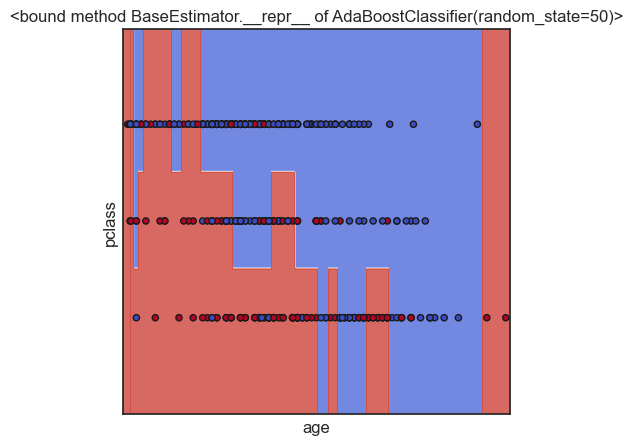

In [ ]:
# Результаты классификации
plot_cl(AdaBoostClassifier(random_state=50))

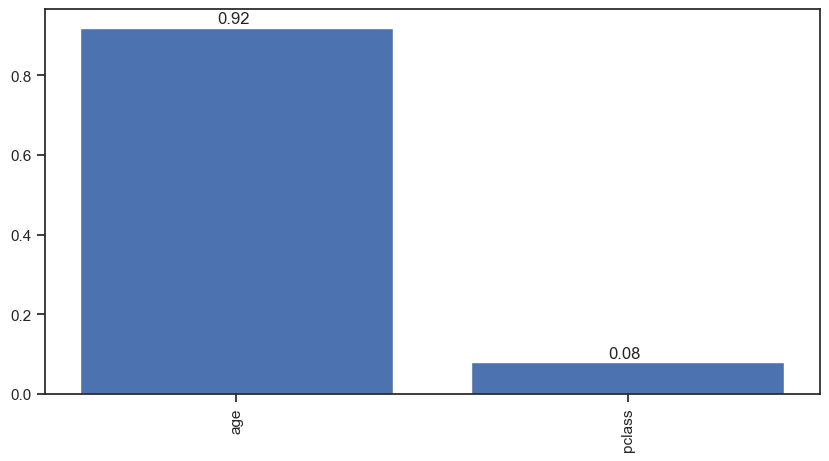

In [ ]:
# Важность признаков
data_x_ds = pd.DataFrame(data=data_X, columns=feature_names)
ab2 = AdaBoostClassifier(random_state=1)
ab2.fit(data_x_ds, data_y)
_,_ = draw_feature_importances(ab2, data_x_ds)

стекинг

In [ ]:
! pip install getargspec

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement getargspec (from versions: none)
ERROR: No matching distribution found for getargspec


In [ ]:
# Качество отдельных моделей
def val_mae(model):
    model.fit(data_X, data_y)
    y_pred = model.predict(test_X)
    result = mean_absolute_error(test_y, y_pred)
    print(model)
    print('MAE={}'.format(result))


In [ ]:
# Точность на отдельных моделях
from sklearn.linear_model import LinearRegression
for model in [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=50)
]:
    val_mae(model)
    print('==========================')
    print()

LinearRegression()
MAE=0.3943551991369284

DecisionTreeRegressor()
MAE=0.3530144732115175

RandomForestRegressor(n_estimators=50)
MAE=0.34520670054813474



In [ ]:
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset


In [ ]:

# набор данных
dataset = Dataset(data_X, data_y, test_X)

# модели первого уровня
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, parameters={'normalize': True},name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 50},name='rf')

In [ ]:
# Эксперимент 1
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: линейная регрессия
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('dt', DecisionTreeClassifier()),
    ('lr',LogisticRegression())
]

# Создание стекинга моделей
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

# Обучение стекинга моделей
stacking.fit(data_X, data_y)

# Предсказание на тестовых данных
predictions = stacking.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7241379310344828


In [ ]:
# Эксперимент 2
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: случайный лес

from sklearn.ensemble import StackingClassifier, RandomForestClassifier
# Создание стекинга моделей
stacking = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(), cv=5)

# Обучение стекинга моделей
stacking.fit(data_X, data_y)

# Предсказание на тестовых данных
predictions = stacking.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6354679802955665


In [ ]:
# Эксперимент 3
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: линейная регрессия
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier())
]

# Создание стекинга моделей
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

# Обучение стекинга моделей
stacking.fit(data_X, data_y)

# Предсказание на тестовых данных
predictions = stacking.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.729064039408867


In [ ]:
# Эксперимент 4
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: случайный лес
# Результат хуже чем в эксперименте 3
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier())
]

# Создание стекинга моделей
stacking = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(), cv=5)

# Обучение стекинга моделей
stacking.fit(data_X, data_y)

# Предсказание на тестовых данных
predictions = stacking.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6699507389162561


In [ ]:
# Визуализация результатов не ьудет


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


boost = AdaBoostClassifier(random_state=50, n_estimators=100)
boost.fit(data_X, data_y)

tree = BaggingClassifier(DecisionTreeClassifier(random_state=50), n_estimators=100)
tree.fit(data_X, data_y)

# Стекинг: комбинация логистической регрессии и SVM
estimators = [
    ('lr', LogisticRegression()),
    ('svm', SVC(probability=True))
]
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stacking.fit(data_X, data_y)

# Обучающая выборка
y_train_pred_tree = tree.predict(data_X)
y_train_pred_boost = boost.predict(data_X)
y_train_pred_stacking = stacking.predict(data_X)

# Тестовая выборка
y_test_pred_tree = tree.predict(test_X)
y_test_pred_boost = boost.predict(test_X)
y_test_pred_stacking = stacking.predict(test_X)

# Точность
train_accuracy_tree = accuracy_score(data_y, y_train_pred_tree)
test_accuracy_tree = accuracy_score(test_y, y_test_pred_tree)

train_accuracy_boost = accuracy_score(data_y, y_train_pred_boost)
test_accuracy_boost = accuracy_score(test_y, y_test_pred_boost)

train_accuracy_stacking = accuracy_score(data_y, y_train_pred_stacking)
test_accuracy_stacking = accuracy_score(test_y, y_test_pred_stacking)

print(f"Бэкинг: Train Accuracy = {train_accuracy_tree}, Test Accuracy = {test_accuracy_tree}")
print(f"Бустинг Boosting: Train Accuracy = {train_accuracy_boost}, Test Accuracy = {test_accuracy_boost}")
print(f"Стэкинг: Train Accuracy = {train_accuracy_stacking}, Test Accuracy = {test_accuracy_stacking}")


Бэкинг: Train Accuracy = 0.8097251585623678, Test Accuracy = 0.7192118226600985
Бустинг Boosting: Train Accuracy = 0.7547568710359408, Test Accuracy = 0.6699507389162561
Стэкинг: Train Accuracy = 0.6976744186046512, Test Accuracy = 0.7142857142857143
